In [1]:
import pandas as pd
import sqlite3
import numpy as np
from matplotlib import pyplot as plt

In [2]:
db = sqlite3.connect("./IMDB.sqlite")

In [3]:
"""
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the most voted movie in IMDB Movie Database.
Print the movie name and the rating of that movie.
Output Format:
movie_name rating
"""
movie_data = pd.read_sql_query("select * from IMDB", db)
ans = movie_data[movie_data["TotalVotes"] == movie_data["TotalVotes"].max()]
print(ans["Title"].values[0], ans["Rating"].values[0])

Inception (2010) 8.8


In [4]:
"""

IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the Movie with Longest-Running Time from IMDB Movie database.
Print the name of movie and running time as integer value.
Note: Don't print 'min' in running time.
Output Format:
movie_name running_time
"""

movie_data["longest_runtime"] = movie_data["Runtime"].apply(lambda x : x.split(" ")[0])
movie_data = movie_data[movie_data["longest_runtime"] != ""]
movie_data["longest_runtime"] = movie_data["longest_runtime"].astype("float64").astype("int64")
ans = movie_data[movie_data["longest_runtime"] == movie_data["longest_runtime"].max()]
print(ans["Title"].values[0], ans["longest_runtime"].values[0])

The Wolf of Wall Street (2013) 180


In [5]:
"""
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the movie which has maximum net profit in IMDB Movie Database.
Print the movie name.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget
Output Format:
movie_name
"""
data = pd.read_sql_query("select * from IMDB as t1 inner join earning as t2 on t1.Movie_id = t2.Movie_id", db)
data = data.loc[:, ["Movie_id", 'Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget','Runtime', 'Domestic','Worldwide']]
data = data[data["Budget"] != ""]
data["Budget"] = data["Budget"].astype("float64")
data["Net_Profit"] = data["Domestic"] + data["Worldwide"] - data["Budget"]
ans = data[data["Net_Profit"] == data["Net_Profit"].max()]["Title"]
print(ans.values[0])

Star Wars: The Force Awakens (2015)


In [6]:
"""
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the least budgeted movie in IMDB Movie Database.
If there is more than one least budgeted movies then print the movie which has maximum net profit.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget
Output Format:
movie_name
"""
data = pd.read_sql_query("select * from IMDB as t1 inner join earning as t2 on t1.Movie_id = t2.Movie_id", db)
data = data.loc[:, ["Movie_id", 'Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget','Runtime', 'Domestic','Worldwide']]
data = data[data["Budget"] != ""]
data["Budget"] = data["Budget"].astype("float64")
data["Net_Profit"] = data["Domestic"] + data["Worldwide"] - data["Budget"]
data = data[data["Budget"] == data["Budget"].min()]
data = data[data["Net_Profit"] == data["Net_Profit"].max()]
print(data["Title"].values[0])

Short Term 12 (2013)


In [7]:
"""
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.
Print the Year and name of the movie which was the highest grosser in that year.
Note:Print the year in ascending order.
"""
data = pd.read_sql_query("select * from IMDB as t1 inner join earning as t2 on t1.Movie_id = t2.Movie_id", db)
data = data.loc[:, ["Movie_id", 'Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget','Runtime', 'Domestic','Worldwide']]
data["highest_grossing_movie"] = data["Domestic"] + data["Worldwide"]

data["Year"] = data["Title"].apply(lambda x: str(x).split(" ")[-1][-5:-1])
grouped_data = data.groupby("Year")["highest_grossing_movie"].max()
ans = dict()
for i in range(len(data["highest_grossing_movie"])):
    if data["highest_grossing_movie"][i] in grouped_data.values:
        key = data["Year"][i]
        value = data["Title"][i]
        ans[key] = value
ans = sorted(ans.items(), key = lambda x:x[0])
ans = dict(ans)
for key, values in ans.items():
    print(key, values)

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


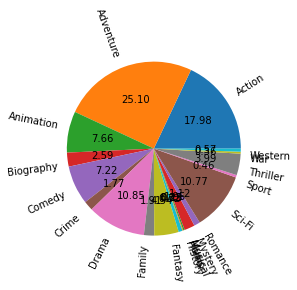

In [8]:
"""
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..
Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.
Output Format:
genre_1 percent_1
genre_2 percent_2
. . .
. . .
"""

data = pd.read_sql_query("select * from IMDB as t1 inner join genre as t2 on t1.Movie_id = t2.Movie_id", db)
data = data.loc[:,["Movie_id", "Title", "Rating", "TotalVotes", "MetaCritic", "Budget", "Runtime", "genre"]]
data = data[data["Budget"] != ""]
data = data[data["genre"] != ""]
data["Budget"] = data["Budget"].astype("float64")
new_data = data.groupby("genre").aggregate(genre_budget_sum = ('Budget', 'sum')).reset_index()
new_data["Percent_budget"] = new_data["genre_budget_sum"] / new_data["genre_budget_sum"].sum() * 100
new_data = new_data[["genre", "Percent_budget"]]
for index, row in new_data.iterrows():
    print(row["genre"], end=" ")
    print("{:.2f}".format(row["Percent_budget"]))
plt.pie(new_data["Percent_budget"], labels=new_data["genre"], autopct="%.2f", rotatelabels=90)
plt.show()

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


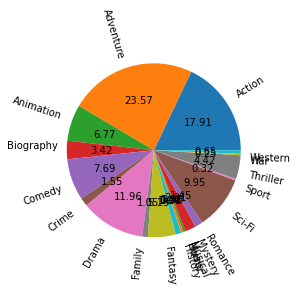

In [9]:
"""
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.
Note: Movies has multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.
Output Format:
genre_1 percent_1
genre_2 percent_2
. . .
"""

data = pd.read_sql_query("select * from IMDB as t1 inner join genre as t2 on t1.Movie_id = t2.Movie_id \
                         inner join earning as t3 on t2.Movie_id = t3.Movie_id", db)
columns = ['Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget', 'Runtime', 'genre', 'Domestic', 'Worldwide']
data = data[columns]
data["total_earnings"] = data["Domestic"] + data["Worldwide"]
data = data[data["genre"] != ""]
data["total_earnings"] = data["total_earnings"].astype("float64")
new_data = data.groupby("genre").aggregate(total_earnings_sum = ('total_earnings', 'sum')).reset_index()
new_data["Percent_total_earnings"] = (new_data["total_earnings_sum"] / new_data["total_earnings_sum"].sum()) * 100
new_data = new_data[["genre", "Percent_total_earnings"]]
for index, row in new_data.iterrows():
    print(row["genre"], end=" ")
    print("{:.2f}".format(row["Percent_total_earnings"]))
plt.pie(new_data["Percent_total_earnings"], labels=new_data["genre"], autopct="%.2f", rotatelabels=90)
plt.show()

In [10]:
"""
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.
Print the movie name.
Movies has multiple genre.
Output Format:
movie_name
"""

data = pd.read_sql_query('Select * from IMDB as t1 inner join genre as t2 on t1.Movie_id  = t2.Movie_id',db)
data = data[((data["genre"]=='Sci-Fi') & (data["Rating"]>=8)) | ((data["genre"]=='Mystery') & (data["Rating"]>=8))]
print(data['Title'].values[0] )

Arrival (2016)
